In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
from MLP import MLP
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
Wine = pd.read_csv('dataset/WineQT.csv')

In [3]:
Wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [4]:
Wine.drop(columns=['Id'], inplace=True)

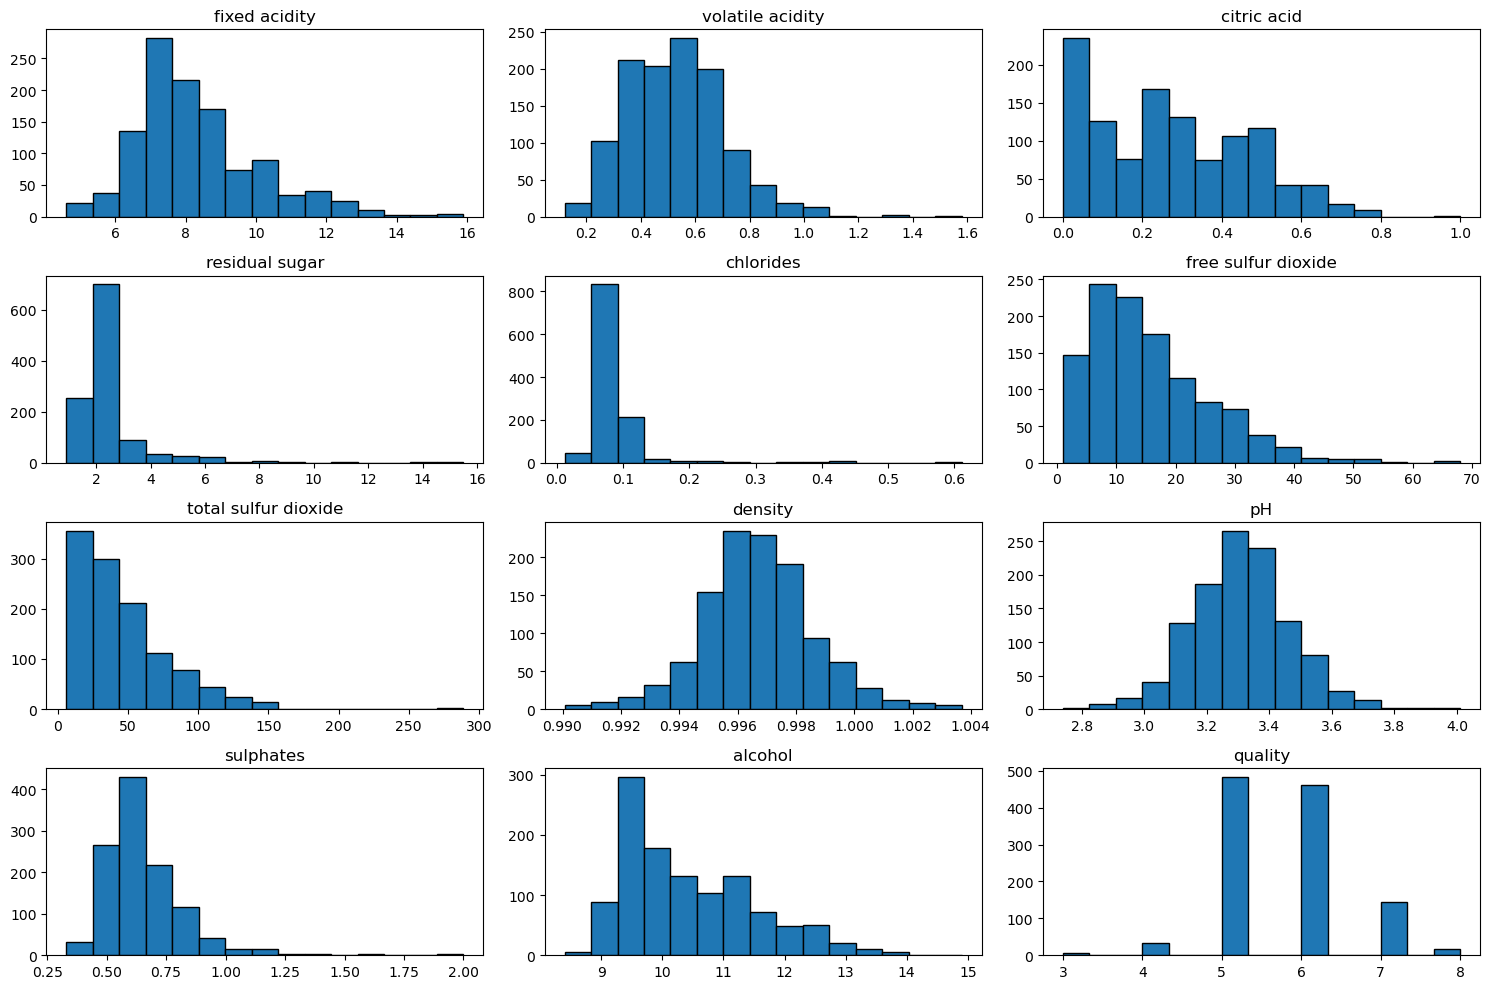

In [5]:
Wine.hist(bins=15, figsize=(15, 10), grid=False, edgecolor='black')

plt.tight_layout()

plt.show()

In [6]:
print(Wine.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [7]:
# Separating features and labels
# y = Wine['label_column']
X = Wine.values

scaler = MinMaxScaler()
Wine_normalized = scaler.fit_transform(X)

# scaler = StandardScaler()
# Wine_standardized = scaler.fit_transform(X)

In [8]:
# np.random.seed(42)
indices = np.arange(Wine_normalized.shape[0])
np.random.shuffle(indices)

split_index1 = int(0.8 * Wine_normalized.shape[0])
split_index2 = int(0.9 * Wine_normalized.shape[0])

Wine_normalized_X_train = Wine_normalized[indices[:split_index1]]
Wine_normalized_X_val = Wine_normalized[indices[split_index1:split_index2]]
Wine_normalized_X_test = Wine_normalized[indices[split_index2:]]

Wine_normalized_X_train = np.delete(Wine_normalized_X_train,Wine_normalized_X_train.shape[1]-1,axis=1)
Wine_normalized_X_val = np.delete(Wine_normalized_X_val,Wine_normalized_X_val.shape[1]-1,axis=1)
Wine_normalized_X_test = np.delete(Wine_normalized_X_test,Wine_normalized_X_test.shape[1]-1,axis=1)

y = Wine.iloc[:, -1].values
Wine_normalized_Y_train = y[indices[:split_index1]]
Wine_normalized_Y_val = y[indices[split_index1:split_index2]]
Wine_normalized_Y_test = y[indices[split_index2:]]

Wine_normalized_Y_train = Wine_normalized_Y_train[:,np.newaxis]
Wine_normalized_Y_val = Wine_normalized_Y_val[:,np.newaxis]
Wine_normalized_Y_test = Wine_normalized_Y_test[:,np.newaxis]

In [9]:
def one_hot_encode(y, num_classes):
    one_hot = np.zeros((y.shape[0], num_classes))
    one_hot[np.arange(y.shape[0]), y] = 1
    return one_hot

Wine_normalized_Y_train -= Wine['quality'].min()
Wine_normalized_Y_val -= Wine['quality'].min()
Wine_normalized_Y_test -= Wine['quality'].min()

num_classes = len(np.unique(Wine_normalized_Y_train))

Wine_normalized_Y_train_one_hot = one_hot_encode(np.squeeze(Wine_normalized_Y_train), num_classes)
Wine_normalized_Y_val_one_hot = one_hot_encode(np.squeeze(Wine_normalized_Y_val),num_classes)
Wine_normalized_Y_test_one_hot = one_hot_encode(np.squeeze(Wine_normalized_Y_test), num_classes)

In [10]:
def one_hot_encode(y, num_classes):
    one_hot = np.zeros((y.shape[0], num_classes))
    one_hot[np.arange(y.shape[0]), y] = 1
    return one_hot

Wine_normalized_Y_train -= Wine['quality'].min()
Wine_normalized_Y_val -= Wine['quality'].min()
Wine_normalized_Y_test -= Wine['quality'].min()

num_classes = len(np.unique(Wine_normalized_Y_train))

Wine_normalized_Y_train_one_hot = one_hot_encode(np.squeeze(Wine_normalized_Y_train), num_classes)
Wine_normalized_Y_val_one_hot = one_hot_encode(np.squeeze(Wine_normalized_Y_val),num_classes)
Wine_normalized_Y_test_one_hot = one_hot_encode(np.squeeze(Wine_normalized_Y_test), num_classes)

In [39]:
best_neurons_per_layer = [64,32]
best_learning_rate = 0.01
best_activation = 'sigmoid'
best_optimizer = 'sgd'
best_epochs = 100

In [52]:
best_model = MLP(
    input_size=Wine_normalized_X_train.shape[1],
    output_size=Wine_normalized_Y_train_one_hot.shape[1],
    hidden_layers=len(best_neurons_per_layer),
    neurons_per_layer=best_neurons_per_layer,
    regression=False,
    learning_rate=best_learning_rate,
    activation=best_activation,
    optimizer=best_optimizer,
    epochs=best_epochs
)

_ = best_model.fit(Wine_normalized_X_train, Wine_normalized_Y_train_one_hot, Wine_normalized_X_val, Wine_normalized_Y_val_one_hot)

In [53]:
predictions = best_model.predict(Wine_normalized_X_test)
predictions = np.argmax(predictions, axis=1)

accuracy = accuracy_score(np.squeeze(Wine_normalized_Y_test),predictions)*100
precision = precision_score(np.squeeze(Wine_normalized_Y_test),predictions,average='macro',zero_division=1)*100
recall = recall_score(np.squeeze(Wine_normalized_Y_test),predictions,average='macro',zero_division=1)*100
f1score = f1_score(np.squeeze(Wine_normalized_Y_test),predictions,average='micro',zero_division=1)*100


print("Test Set Performance:")
print(f"Accuracy: {accuracy}%")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1score}")

Test Set Performance:
Accuracy: 24.347826086956523%
Precision: 67.97138047138046
Recall: 32.42651657285804
F1 Score: 24.347826086956523
